
# Installing Dependencies

To ensure that all the necessary dependencies are installed for this notebook, run the following commands:

!pip install pandas numpy scikit-learn keras matplotlib


# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


# Importing the CSV file into a pandas DataFrame

In this cell, we will import the 'Car_price_cleaned.csv' file into a pandas DataFrame for further analysis.

In [2]:
# Importing the CSV file into a pandas DataFrame
df = pd.read_csv('Car_price_cleaned.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,curbweight_squared,enginesize_squared,boreratio_squared,stroke_squared,compressionratio_squared,horsepower_squared,peakrpm_squared,citympg_squared,highwaympg_squared,log_enginesize
0,1,3,alfa-romero giulia,1,0,1,0,2,0,-1.690772,...,6492304,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,-1.690772,...,6492304,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,-0.708596,...,7969329,23104,7.1824,12.0409,81.0,23716,25000000,361,676,5.030438
3,4,2,audi 100 ls,1,0,0,3,1,0,0.173698,...,5461569,11881,10.1761,11.5600,100.0,10404,30250000,576,900,4.700480
4,5,2,audi 100ls,1,0,0,3,0,0,0.107110,...,7974976,18496,10.1761,11.5600,64.0,13225,30250000,324,484,4.919981


Now we drop the car_ID column which isn't needed and will add noise to our data

In [3]:
df.drop('car_ID',axis='columns',inplace=True)

We will stick with only the first part of the CarName as it is the Company that made the car

In [4]:
# Applying a lambda function to change the CarName to only the first word
df['CarName'] = df['CarName'].apply(lambda x: x.split()[0])
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight_squared,enginesize_squared,boreratio_squared,stroke_squared,compressionratio_squared,horsepower_squared,peakrpm_squared,citympg_squared,highwaympg_squared,log_enginesize
0,3,alfa-romero,1,0,1,0,2,0,-1.690772,-0.426521,...,6492304,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197
1,3,alfa-romero,1,0,1,0,2,0,-1.690772,-0.426521,...,6492304,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197
2,1,alfa-romero,1,0,1,2,2,0,-0.708596,-0.231513,...,7969329,23104,7.1824,12.0409,81.0,23716,25000000,361,676,5.030438
3,2,audi,1,0,0,3,1,0,0.173698,0.207256,...,5461569,11881,10.1761,11.5600,100.0,10404,30250000,576,900,4.700480
4,2,audi,1,0,0,3,0,0,0.107110,0.207256,...,7974976,18496,10.1761,11.5600,64.0,13225,30250000,324,484,4.919981


Show the columns to check what data we will input the model and what we want to predict

In [5]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'brand',
       'model', 'power_to_weight_ratio', 'wheelbase_squared',
       'carlength_squared', 'carwidth_squared', 'carheight_squared',
       'curbweight_squared', 'enginesize_squared', 'boreratio_squared',
       'stroke_squared', 'compressionratio_squared', 'horsepower_squared',
       'peakrpm_squared', 'citympg_squared', 'highwaympg_squared',
       'log_enginesize'],
      dtype='object')

Our target will be the price of the car and we will remain with all the other data to predict it.

In [6]:
Target = df['price']
Data = df.drop('price', axis='columns')


Remember we stick with the first part of the Car Name? Ok, now we will encode them and put it in a column call 'CarName_encoded', models doesn't like strings

In [7]:
label_encoder = LabelEncoder()

Data['CarName_encoded'] = label_encoder.fit_transform(Data['CarName'])


Let's see how our Data looks like

In [8]:
Data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize_squared,boreratio_squared,stroke_squared,compressionratio_squared,horsepower_squared,peakrpm_squared,citympg_squared,highwaympg_squared,log_enginesize,CarName_encoded
0,3,alfa-romero,1,0,1,0,2,0,-1.690772,-0.426521,...,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197,1
1,3,alfa-romero,1,0,1,0,2,0,-1.690772,-0.426521,...,16900,12.0409,7.1824,81.0,12321,25000000,441,729,4.875197,1
2,1,alfa-romero,1,0,1,2,2,0,-0.708596,-0.231513,...,23104,7.1824,12.0409,81.0,23716,25000000,361,676,5.030438,1
3,2,audi,1,0,0,3,1,0,0.173698,0.207256,...,11881,10.1761,11.5600,100.0,10404,30250000,576,900,4.700480,2
4,2,audi,1,0,0,3,0,0,0.107110,0.207256,...,18496,10.1761,11.5600,64.0,13225,30250000,324,484,4.919981,2


We will define all variables as X (We already drop the price from the Data dataset), instead of using CarName we will use our encoded CarName.

In [9]:
X=Data[['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'brand',
       'model', 'power_to_weight_ratio', 'wheelbase_squared',
       'carlength_squared', 'carwidth_squared', 'carheight_squared',
       'curbweight_squared', 'enginesize_squared', 'boreratio_squared',
       'stroke_squared', 'compressionratio_squared', 'horsepower_squared',
       'peakrpm_squared', 'citympg_squared', 'highwaympg_squared',
       'log_enginesize','CarName_encoded']].to_numpy()


Now we will scale the prices of the cars to make them fit between 0 and 1, this is because models also doesn't really like big large numbers.

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
y = scaler.fit_transform(Target.to_numpy().reshape(-1, 1))

Everything seems alright, let's split our Data (X) and our Prices (y) into train and test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

Let's see how our Input Train Data Looks like

In [12]:
X_train

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.25000000e+02, 5.20400669e+00, 1.40000000e+01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.50000000e+03, 4.64439090e+00, 1.40000000e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        9.61000000e+02, 4.69134788e+00, 2.10000000e+01],
       ...,
       [3.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        3.24000000e+02, 5.45958551e+00, 4.00000000e+00],
       [2.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        9.61000000e+02, 4.69134788e+00, 2.10000000e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.08900000e+03, 4.70953020e+00, 7.00000000e+00]])

And now let's see how our Output Train Data looks

In [13]:
y_train

array([[0.32970061],
       [0.04917829],
       [0.12611092],
       [0.07638648],
       [0.06655578],
       [0.88977707],
       [0.02425401],
       [0.32351919],
       [0.20805819],
       [0.57241448],
       [0.16836304],
       [0.48277146],
       [0.10277543],
       [0.09252271],
       [0.02921901],
       [0.15217715],
       [0.09252271],
       [0.21702001],
       [0.07745395],
       [0.16699767],
       [0.14348841],
       [0.18981183],
       [0.26393923],
       [0.06901346],
       [0.039149  ],
       [0.05414329],
       [0.12020257],
       [0.36197309],
       [0.16712179],
       [0.12976019],
       [0.78849114],
       [0.25152674],
       [0.00570975],
       [0.34337918],
       [0.75547391],
       [0.10376843],
       [0.32833524],
       [0.29683233],
       [0.05652649],
       [0.05538454],
       [0.06183903],
       [0.00945832],
       [0.15964947],
       [0.09440941],
       [0.39352564],
       [0.71769028],
       [0.23040068],
       [0.269

Now we will make our model... I used LSTM as I find out it has better results, but you could use SimpleRNN, or even only a Dense model...
For SimpleRNN and LSTM (Or GRU) to work, the model needs a three dimensional array so we add the return_sequences to it to make it 3D.
Our input will be the X_train.shape (Which are the columns that will enter the model), 1 (Which is each row)

In [14]:


# Define the model
model = Sequential()

# Add a SimpleRNN layer with 50 units
model.add(LSTM(256, input_shape=(X_train.shape[1], 1), return_sequences=True))

model.add(LSTM(128, return_sequences=True))
# Add a Dropout layer with a dropout rate of 0.2
model.add(Dropout(0.2))

model.add(LSTM(64))

model.add(Dense(32))

# Add a Dense layer with one unit for the output
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary


All done! Let's see how our model looks like

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 41, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 41, 128)           197120    
                                                                 
 dropout (Dropout)           (None, 41, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 512,833
Trainable params: 512,833
Non-trai

Now we will reshape our X_train... This is because the LSTM layer needs a 3 dimensional array, we will insert as the first dimension the X_train shape[0] (164) and the second dimension will be , X_train shape[1] as the second one (Which is 41) and we will use a third dimension with a 1 in it

In [16]:
# Reshape X_train to be 3-dimensional as required by the SimpleRNN layer
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

### Checkpoint
We want our model to save the best approximate to the car prices, so we will include a checkpoint callback

In [17]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', save_weights_only=True)

Now we fit our model with the X_train_reshaped
We will also use part of the train data as validation (We need this because we are using a checkpoint that works with this data to determine the best model)

In [18]:
# Fit the model with X_train and y_train
model.fit(X_train_reshaped, y_train, epochs=150, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/150
5/5 [==============================] - 6s 200ms/step - loss: 0.3699 - val_loss: 0.2566
Epoch 2/150
5/5 [==============================] - 0s 24ms/step - loss: 0.0976 - val_loss: 0.1117
Epoch 3/150
5/5 [==============================] - 0s 27ms/step - loss: 0.0620 - val_loss: 0.0623
Epoch 4/150
5/5 [==============================] - 0s 28ms/step - loss: 0.0552 - val_loss: 0.0542
Epoch 5/150
5/5 [==============================] - 0s 19ms/step - loss: 0.0430 - val_loss: 0.0698
Epoch 6/150
5/5 [==============================] - 0s 25ms/step - loss: 0.0564 - val_loss: 0.0512
Epoch 7/150
5/5 [==============================] - 0s 20ms/step - loss: 0.0396 - val_loss: 0.0616
Epoch 8/150
5/5 [==============================] - 0s 20ms/step - loss: 0.0448 - val_loss: 0.0523
Epoch 9/150
5/5 [==============================] - 0s 23ms/step - loss: 0.0372 - val_loss: 0.0499
Epoch 10/150
5/5 [==============================] - 0s 22ms/step - loss: 0.0377 - val_loss: 0.0494
Epoch 11/150
5/5 [

Ok, everything seems alright! Now let's try our new model, first we will reshape our test data

In [19]:
# Reshape X_test to be 3-dimensional as required by the SimpleRNN layer
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Now let's evaluate our model, we will use our reshaped test data and the y_test

In [20]:

# Evaluate the model
loss = model.evaluate(X_test_reshaped, y_test)

print(f'Model Loss on Test Data: {loss}')

2/2 [==============================] - 0s 10ms/step - loss: 0.0048
Model Loss on Test Data: 0.004842610564082861


We have a loss of 0.004842610564082861 seems to be alright, let's try prediting all the inputs and let's see what differences do we have between our predicted value and the real value of our test data.

In [21]:
# Predict a single value from y_test
y_pred = model.predict(X_test_reshaped)

# Inverse transform the predicted value to its original form
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)



2/2 [==============================] - 1s 3ms/step


#### Graph
Let's see it in an old fashion style.

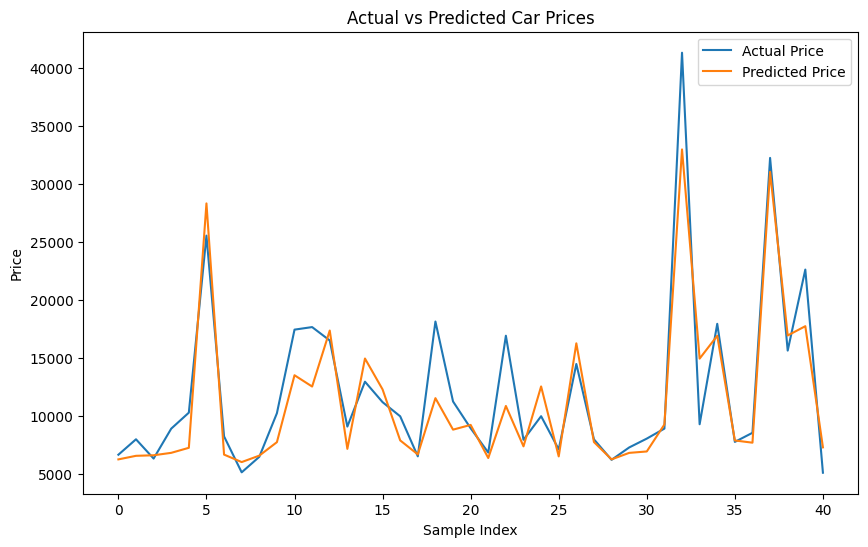

In [22]:
# Plotting the differences between y_pred_original and y_test_original
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual Price')
plt.plot(y_pred_original, label='Predicted Price')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Car Prices')
plt.legend()
plt.show()

#### We finish our model, as you can see, it predicts very well the price of the cars using the info we input to it.